In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("proj1a.ipynb")

# Project 1A: Exploring Cook County Housing

## Due Date: Thursday, October 13th, 11:59 PM PDT

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the collaborators cell below.

**Collaborators:** *list names here*

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Introduction

This project explores what can be learned from an extensive housing data set that is embedded in a dense social context in Cook County, Illinois.

Here in part A, we will guide you through some basic exploratory data analysis (EDA) to understand the structure of the data. Next, you will be adding a few new features to the dataset, while cleaning the data as well in the process.

In part B, you will specify and fit a linear model for the purpose of prediction. Finally, we will analyze the error of the model and brainstorm ways to improve the model's performance.


## Score Breakdown

Question | Part | Points
----|----|----
1 | 1 | 1
1 | 2 | 1
1 | 3 | 1
1 | 4 | 1
2 | 1 | 1
2 | 2 | 1
3 | 1 | 3
3 | 2 | 1
3 | 3 | 1
4 | - | 2
5 | 1 | 1
5 | 2 | 2
5 | 3 | 2
6 | 1 | 1
6 | 2 | 2
6 | 3 | 1
6 | 4 | 2
6 | 5 | 1
7 | 1 | 1
7 | 2 | 2
Total | - | 28

In [2]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

from ds100_utils import run_linear_regression_test

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/>
<hr style="border: 1px solid #fdb515;" />

# The Data

The data set consists of over 500 thousand records from Cook County, Illinois, the county where Chicago is located. The data set we will be working with has 61 features in total; the 62nd is sales price, which you will predict with linear regression in the next part of this project. An explanation of each variable can be found in the included `codebook.txt` file. Some of the columns have been filtered out to ensure this assignment doesn't become overly long when dealing with data cleaning and formatting.

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for this part of the project.

Let's first extract the data from the `cook_county_data.zip`. Notice we didn't leave the `csv` files directly in the directory because they take up too much space without some prior compression.

In [3]:
with zipfile.ZipFile('cook_county_data.zip') as item:
    item.extractall()

Let's load the training data.

In [4]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

As a good sanity check, we should at least verify that the data shape matches the description.

In [5]:
# 204792 observations and 62 features in training data
assert training_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in training_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `codebook.txt` (in the same directory as this notebook).  **You should take some time to familiarize yourself with the codebook before moving forward.**

Let's take a quick look at all the current columns in our training data.

In [6]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [7]:
training_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<!-- BEGIN QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Contextualizing the Data

Let's try to understand the background of our dataset before diving into a full-scale analysis.


## Question 1

### Part 1

Based on the columns present in this data set and the values that they take, what do you think each row represents? That is, what is the granularity of this data set? 


I think each row in the data set describes the property and recorded sales.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Part 2

Why do you think this data was collected? For what purposes? By whom?

This question calls for your speculation and is looking for thoughtfulness, not correctness. 


I think this data was collected by experts to find patterns of properties in data set and to predict sale price of properties.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Part 3

Certain variables in this data set contain information that either directly contains demographic information (data on people) or could when linked to other data sets. Identify at least one demographic-related variable and explain the nature of the demographic data it embeds. 


I think demographic-related variables are neighborhood code and town and neighborhood. These contains demographic information because with these, we will be able to know whether this specific property is located in a low income area or middle class and wheter this propery is in an area that is dominated by certain race or not.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
### Part 4

Craft at least two questions about housing in Cook County that can be answered with this data set and provide the type of analytical tool you would use to answer it (e.g. "I would create a ___ plot of ___ and ___" or "I would calculate the ___ [summary statistic] for ___ and ____"). Be sure to reference the columns that you would use and any additional data sets you would need to answer that question.


I would ask to find average housing sales price in each neighborhood to find out about which neighborhoods are wealthy or poor. I would use variables, 'Sale Price' and 'Neigborhood Code (mapping)' and calculate average sale price and create a box plot to see the distribution. Also I would use variables, 'Building Square Feet' and 'Sale Price' to find the relationship between property's size and the price. I would calculate average sale price for similar square 

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 2: Exploratory Data Analysis

This data set was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home (if you didn't put this for your answer for Question 1 Part 2, please don't go back and change it - we wanted speculation!). You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf). In part 2 of this project you will be building a linear model that predict sales prices using training data but it's important to first understand how the structure of the data informs such a model. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

Note that we will perform EDA on the **training data**.

### Sale Price
We begin by examining the distribution of our target variable `SalePrice`.  At the same time, we also take a look at some descriptive statistics of this variable. We have provided the following helper method `plot_distribution` that you can use to visualize the distribution of the `SalePrice` using both the histogram and the box plot at the same time. Run the following 2 cells and describe what you think is wrong with the visualization.

In [8]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)



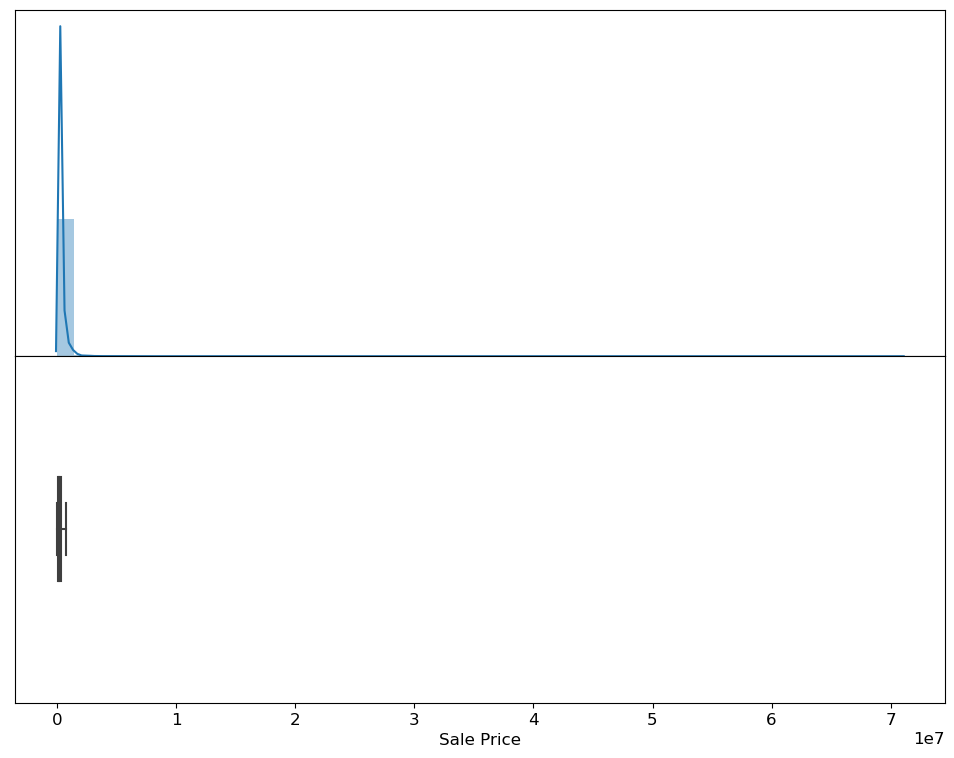

In [9]:
plot_distribution(training_data, label='Sale Price')

<!-- BEGIN QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 2

### Part 1

Identify one issue with the visualization above and briefly describe one way to overcome it. You may also want to try running `training_data['Sale Price'].describe()` in a different cell to see some specific summary statistics on the distribution of the target variable. Make sure to delete the cell afterwards as the autograder may not work otherwise.

One issue with the visuzliation above is that there is an outlier which makes the axis wide and makes it hard to see overall distribution. One way to overcome it is to use apply log transformation to sale price.

<!-- END QUESTION -->



In [10]:
# optional cell for scratch work
training_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

---
### Part 2

To zoom in on the visualization of most households, we will focus only on a subset of `Sale Price` for this assignment. In addition, it may be a good idea to apply log transformation to `Sale Price`. In the cell below, reassign `training_data` to a new dataframe that is the same as the original one **except with the following changes**:

- `training_data` should contain only households whose price is at least $500.
- `training_data` should contain a new `Log Sale Price` column that contains the log-transformed sale prices.

**Note**: This also implies from now on, our target variable in the model will be the log transformed sale prices from the column `Log Sale Price`. 

**Note**: You should **NOT** remove the original column `Sale Price` as it will be helpful for later questions.

*To ensure that any error from this part does not propagate to later questions, there will be no hidden test here.*



In [11]:
training_data = training_data[training_data['Sale Price'] >= 500]
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])

In [12]:
grader.check("q2b")

q2b results: All test cases passed!

Let's create a new distribution plot on the log-transformed sale price.

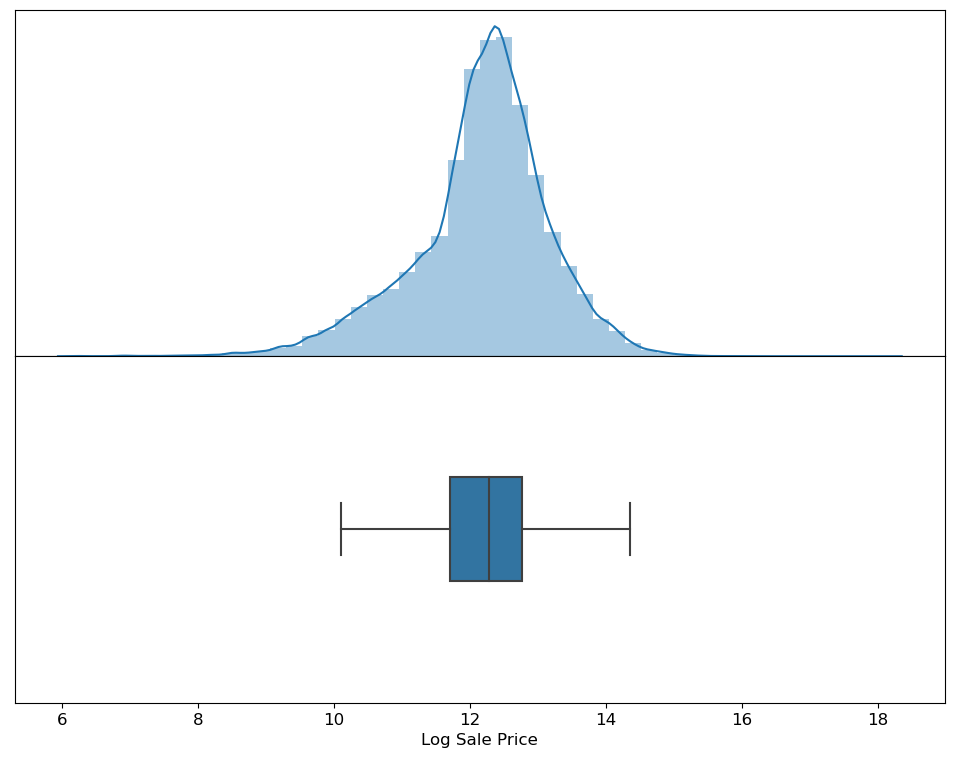

In [13]:
plot_distribution(training_data, label='Log Sale Price');

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 3

### Part 1
To check your understanding of the graph and summary statistics above, answer the following `True` or `False` questions:

1. The distribution of `Log Sale Price` in the training set is symmetric.
1. The mean of `Log Sale Price` in the training set is greater than the median.
1. At least 25% of the houses in the training set sold for more than \$200,000.00.

*The provided tests for this question do not confirm that you have answered correctly; only that you have assigned each variable to `True` or `False`.*


In [14]:
# These should be True or False
q3statement1 = True
q3statement2 = False
q3statement3 = True

In [15]:
grader.check("q3a")

q3a results: All test cases passed!

---
### Part 2

Next, we want to explore if any there is any correlation between `Log Sale Price` and the total area occupied by the household. The `codebook.txt` file tells us the column `Building Square Feet` should do the trick -- it measures "(from the exterior) the total area, in square feet, occupied by the building".

Before creating this jointplot however, let's also apply a log transformation to the `Building Square Feet` column.

In the following cell, create a new column `Log Building Square Feet` in our `training_data` that contains the log transformed area occupied by each household. 

**You should NOT remove the original `Building Square Feet` column this time as it will be used for later questions**. 

*To ensure that any errors from this part do not propagate to later questions, there will be no hidden tests here.*


In [16]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

In [17]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

---
### Part 3

As shown below, we created a joint plot with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, we fit a simple linear regression line through the bivariate scatter plot in the middle.

Based on the following plot, does there exist a correlation between `Log Sale Price` and `Log Building Square Feet`? Would `Log Building Square Feet` make a good candidate as one of the features for our model?

![Joint Plot](images/q2p3_jointplot.png)


Based on the following plot, there exists a correlation between Log Sale Price and Log Building Square Feet because as Log Building Square Feet increases Log Sale Price increases. I think Log Building Square Feet makes a good candidate as one of the features for our model because the plot shows that these two variables have a linear regression.

<!-- END QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 4

Continuing from the previous part, as you explore the data set, you might still run into more outliers that prevent you from creating a clear visualization or capturing the trend of the majority of the houses. 

For this assignment, we will work to remove these outliers from the data as we run into them. Write a function `remove_outliers` that removes outliers from a data set based off a threshold value of a variable.  For example, `remove_outliers(training_data, 'Building Square Feet', upper=8000)` should return a data frame with only observations that satisfy `Building Square Feet` less than or equal to 8000.

*The provided tests check that training_data was updated correctly, so that future analyses are not corrupted by a mistake. However, the provided tests do not check that you have implemented remove_outliers correctly so that it works with any data, variable, lower, and upper bound.*


In [18]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    return data[data[variable].between(lower, upper)] 

In [19]:
grader.check("q4")

q4 results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 3: Feature Engineering

In this section we will walk you through a few feature engineering techniques. 

### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the `Bedrooms` column doesn't actually exist in the original dataframe! Instead, it is part of the `Description` column.

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 5

### Part 1

Let's take a closer look at the `Description` column first. Compare the description across a few rows together at the same time. For the following list of variables, how many of them can be extracted from the `Description` column? Assign your answer as an integer to the variable `q4a`.
- The date the property was sold on
- The number of stories the property contains
- The previous owner of the property
- The address of the property
- The number of garages the property has
- The total number of rooms inside the property
- The total number of bedrooms inside the property
- The total number of bathrooms inside the property



In [20]:
q5a = 6

In [21]:
grader.check("q5a")

q5a results: All test cases passed!

In [22]:
# optional cell for scratch work

---
### Part 2

Write a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` that contains the total number of bedrooms (as integers) for each house. **Treat missing values as zeros if necessary**. Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

**Hint**: You should consider inspecting the `Description` column to figure out if there is any general structure within the text. Once you have noticed a certain pattern, you are set with the power of Regex!


In [23]:
def add_total_bedrooms(data):
    """
    Input:
      data (data frame): a data frame containing at least the Description column.
    """
    with_rooms = data.copy()
    with_rooms['Bedrooms'] = with_rooms['Description'].str.extract(r', (\d+)').astype(int)
    return with_rooms

training_data = add_total_bedrooms(training_data)

In [24]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

---
### Part 3

Create a visualization that clearly and succintly shows if there exists an association between  `Bedrooms` and `Log Sale Price`. A good visualization should satisfy the following requirements:
- It should avoid overplotting.
- It should have clearly labeled axes and succinct title.
- It should convey the strength of the correlation between the sale price and the number of rooms. 

**Hint**: A direct scatter plot of the sale price against the number of rooms for all of the households in our training data might risk overplotting.


Text(0.5, 1.0, 'Bedrooms vs Log Sale Price')

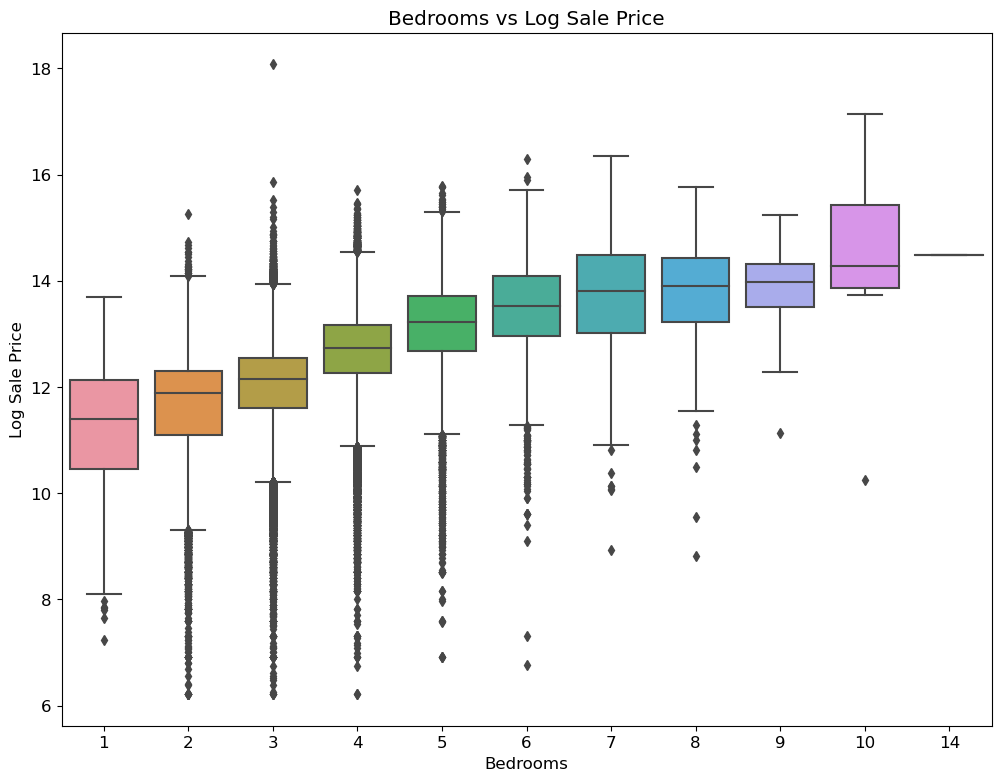

In [25]:
sns.boxplot(data = training_data, x = 'Bedrooms', y = 'Log Sale Price')
plt.xlabel('Bedrooms')
plt.ylabel('Log Sale Price')
plt.title('Bedrooms vs Log Sale Price')

<!-- END QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 6

Now, let's take a look at the relationship between neighborhood and sale prices of the houses in our data set.
Notice that currently we don't have the actual names for the neighborhoods. Instead we will use a similar column `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office).

### Part 1

Before creating any visualization, let's quickly inspect how many different neighborhoods we are dealing with.

Assign the variable `num_neighborhoods` with the total number of neighborhoods in `training_data`. 


In [26]:
num_neighborhoods = np.array(training_data['Neighborhood Code'].unique()).size
num_neighborhoods

193

In [27]:
grader.check("q6a")

q6a results: All test cases passed!

---
### Part  2

If we try directly plotting the distribution of `Log Sale Price` for all of the households in each neighborhood using the `plot_categorical` function from the next cell, we would get the following visualization.
![overplot](images/q5p2_catplot.png)

In [28]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

Oh no, looks like we have run into the problem of overplotting again! 

You might have noticed that the graph is overplotted because **there are actually quite a few neighborhoods in our dataset**! For the clarity of our visualization, we will have to zoom in again on a few of them. The reason for this is our visualization will become quite cluttered with a super dense x-axis.

Assign the variable `in_top_20_neighborhoods` to a copy of `training_data` that contains only top 20 neighborhoods with the most number of houses.


In [29]:
top20 = training_data['Neighborhood Code'].value_counts().head(20).index
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top20)]

In [30]:
grader.check("q6b")

q6b results: All test cases passed!

Let's create another of the distribution of sale price within in each neighborhood again, but this time with a narrower focus!

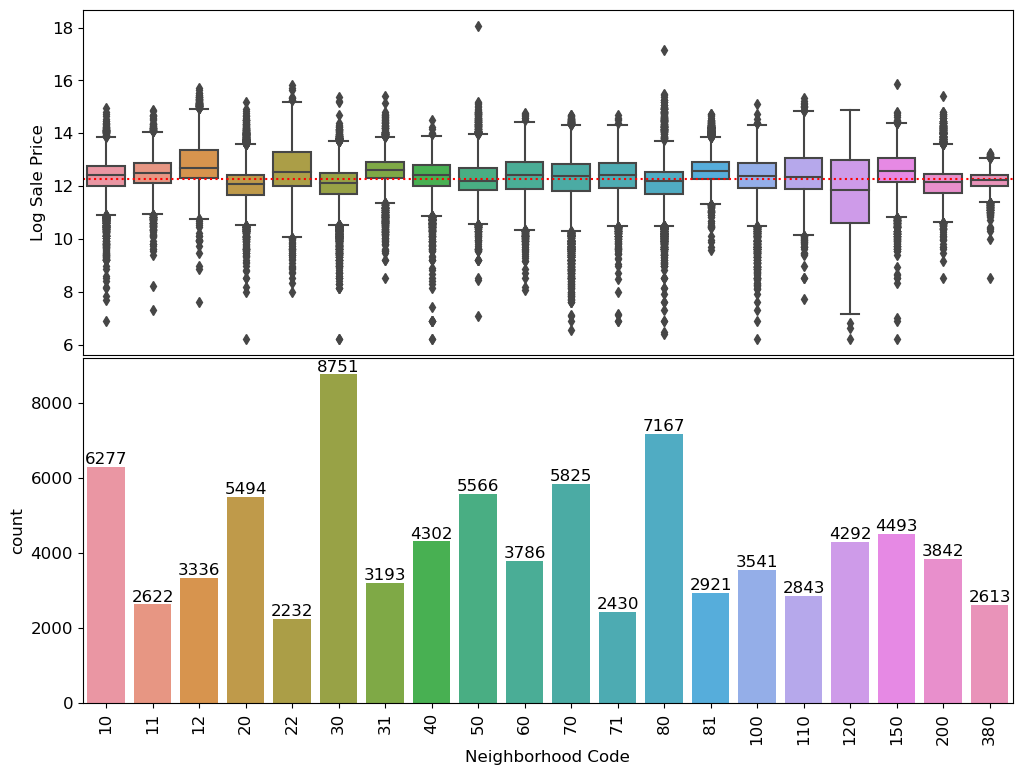

In [31]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

<!-- BEGIN QUESTION -->

---
### Part 3

It looks a lot better now than before, right? Based on the plot above, what can be said about the relationship between the houses' `Log Sale Price` and their neighborhoods?


Based on the plot above, the distribution of neighborhood code isn't uniform. The counts of each neighborhood code varies a lot. The box plot shows that the medain of log sale price for each neighborhood code is pretty similar, around the red dotted line.

<!-- END QUESTION -->

---
### Part 4

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together.  Let's categorize our neighborhoods in a crude way: we'll take the top 3 neighborhoods measured by median `Log Sale Price` and identify them as "expensive neighborhoods"; the other neighborhoods are not marked.

Write a function that returns list of the neighborhood codes of the top `n` most pricy neighborhoods as measured by our choice of aggregating function.  For example, in the setup above, we would want to call `find_expensive_neighborhoods(training_data, 3, np.median)` to find the top 3 neighborhoods measured by median `Log Sale Price`.


In [32]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (data frame): should contain at least a string-valued 'Neighborhood Code'
        and a numeric 'Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods as measured by the metric function
    """
    neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric).sort_values(ascending = False).head(n).index
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

In [33]:
grader.check("q6d")

q6d results: All test cases passed!

---
### Part 5
We now have a list of neighborhoods we've deemed as higher-priced than others.  Let's use that information to write a function `add_expensive_neighborhood` that adds a column `in_expensive_neighborhood` which takes on the value 1 if the house is part of `expensive_neighborhoods` and the value 0 otherwise. This type of variable is known as an **indicator variable**.

**Hint:** [`pd.Series.astype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting True/False values to integers.


In [34]:
def add_in_expensive_neighborhood(data, neighborhoods):
    """
    Input:
      data (data frame): a data frame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      data frame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(neighborhoods).astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

In [35]:
grader.check("q6e")

q6e results: All test cases passed!

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 7

In the following question, we will take a closer look at the `Roof Material` feature of the dataset and examine how we can incorporate categorical features into our linear model.

### Part 1

If we look at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column.
```
Central Heating (Nominal): 

       1	Shingle/Asphalt
       2	Tar&Gravel
       3	Slate
       4	Shake
       5    Tile
       6    Other
```

Write a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with their corresponding roof material. Your function should return a new DataFrame, not modify the existing DataFrame.

**Hint**: the [DataFrame.replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) method may be useful here.



In [36]:
def substitute_roof_material(data):
    """
    Input:
      data (data frame): a data frame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      data frame identical to the input except with a refactored 'Roof Material' column
    """
    data = data.replace({'Roof Material' : 
                         {1 : 'Shingle/Asphalt', 
                          2: 'Tar&Gravel', 
                          3: 'Slate', 
                          4: 'Shake', 
                          5: 'Tile', 
                          6: 'Other'}})

    return data
    
training_data = substitute_roof_material(training_data)
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,Shingle/Asphalt,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3,0
4,31361040550000,202,120,8400.0,32,0.0,3.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2,0
6,30314240080000,203,181,10890.0,37,0.0,1.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,4,0


In [37]:
grader.check("q7a")

q7a results: All test cases passed!

---
### Part 2

#### An Important Note on One Hot Encoding 

Unfortunately, simply fixing these missing values isn't sufficient for using `Roof Material` in our model.  Since `Roof Material` is a categorical variable, we will have to one-hot-encode the data.  Notice in the example code below that we have to pre-specify the categories. For more information on categorical data in pandas, refer to this [link](https://pandas-docs.github.io/pandas-docs-travis/user_guide/categorical.html). For more information on why we want to use one-hot-encoding, refer to this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Complete the following function `ohe_roof_material` that returns a dataframe with the new column one-hot-encoded on the roof material of the household. These new columns should have the form `Roof Material_MATERIAL`. Your function should return a new DataFrame, not modify the existing DataFrame.

**Note**: You should **avoid using `pd.get_dummies`** in your solution as it will remove your original column and is therefore not as reusable as your constructed data preprocessing pipeline. Instead, you can one-hot-encode one column into multiple columns **using Scikit-learn's [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)**. It's far more customizable!

*Hint*: To get you started with this subpart, here is code that initializes a `OneHotEncoding` pre-processing "model" from Scikit-learn and fits it on a simple dataset containing (some of) the first names of your instructional staff this summer! Please play with this code before jumping into the roof material data if you are unsure how to approach the question using `OneHotEncoder`.

```
>>> oh_enc = OneHotEncoder()
>>> oh_enc.fit([['Anirudhan'], ['Dominic'], ['Rahul'], ['Rahul'], ['Anirudhan'], ['Yike'], ['Vasanth']]);
>>> oh_enc.transform([['Anirudhan'], ['Rahul'], ['Dominic']]).toarray()
array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])
```


In [38]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Roof Material']])
    da = oh_enc.transform(data[['Roof Material']]).toarray()
    ohData = pd.DataFrame(data = da, index = data.index, columns = oh_enc.get_feature_names())
    ohData.rename(columns = {'x0_Shingle/Asphalt':'Roof Material_Shingle/Asphalt', 
                         'x0_Tar&Gravel':'Roof Material_Tar&Gravel', 'x0_Slate' : 'Roof Material_Slate',
                        'x0_Shake' : 'Roof Material_Shake', 'x0_Tile' : 'Roof Material_Tile', 'x0_Other' : 'Roof Material_Other'}, inplace = True)
    return data.join(ohData)

    

training_data = ohe_roof_material(training_data)
training_data.filter(regex='^Roof Material_').head(10)

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar&Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
grader.check("q7b")

q7b results: All test cases passed!

## Congratulations! You have finished Project 1A!

In Project 1B, you will focus on building a linear model to predict home prices. You will be well-prepared to build such a model: you have considered what is in this data set, what it can be used for, and engineered some features that should be useful for prediction. Creating a house-pricing model for Cook County has some challenging social implications to think, though, however. This will be addressed in Lecture 14 on July 14 (pretty cool coincidence?!) and Thursday's discussion.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [40]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q2b results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q4 results: All test cases passed!

    q5a results: All test cases passed!

    q5b results: All test cases passed!

    q6a results: All test cases passed!

    q6b results: All test cases passed!

    q6d results: All test cases passed!

    q6e results: All test cases passed!

    q7a results: All test cases passed!

    q7b results: All test cases passed!
